In [82]:
# Importing necessary dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import joblib
%matplotlib inline

In [2]:
# Setting up pandas disploy options
pd.set_option('display.max_columns', None)

# Data Import

In [3]:
# Reading the data
df = pd.read_csv('breast cancer (1).csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.shape

(569, 33)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
# Checking for missing values in the dataset
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
percentage_missing = (df['Unnamed: 32'].isnull().sum()/len(df))*100
print('Percentage of missing values in the column "Unnamed: 32" is: ', percentage_missing, '%')

Percentage of missing values in the column "Unnamed: 32" is:  100.0 %


In [10]:
# Removing the feature 'Unnamed: 32' as it has 100% missing values
df.drop(['Unnamed: 32'], axis = 1, inplace = True)

In [11]:
df.shape

(569, 32)

In [12]:
# Checking for duplicate entries
df.duplicated().sum()

np.int64(0)

Observation: No missing values found

In [13]:
# Seperating the features into numerical and categorical features
numerical_features = [features for features in df.columns if df[features].dtypes != 'O']
categorical_features = [features for features in df.columns if df[features].dtypes == 'O']

print('Number of numerical features: ', len(numerical_features))
print('Number of categorical features: ', len(categorical_features))

Number of numerical features:  31
Number of categorical features:  1


# Exploratory Data Analysis

In [14]:
categorical_features

['diagnosis']

<h3> Feature 0 (target feature): diagnosis

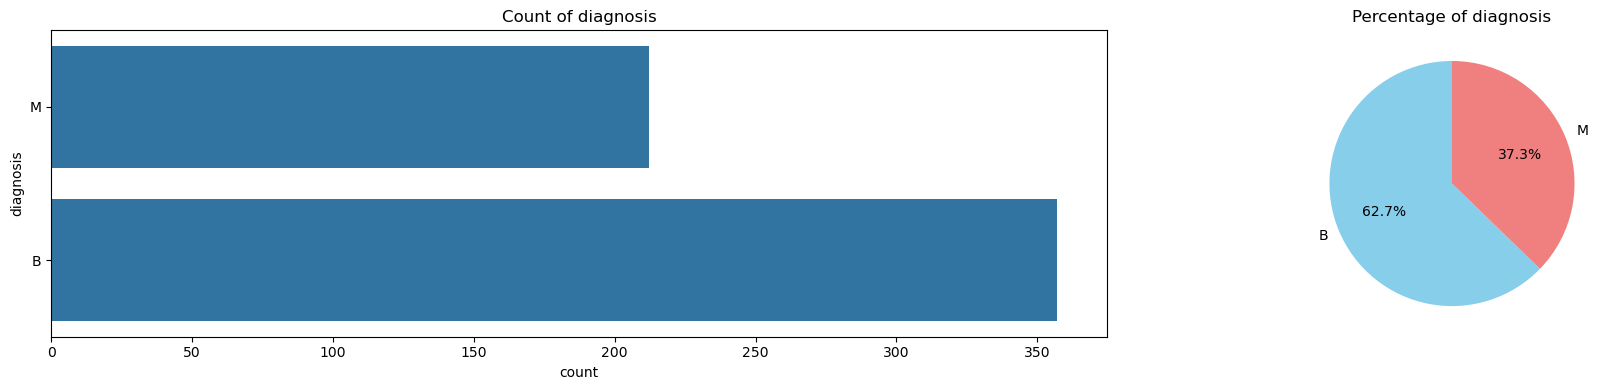

In [15]:
plt.figure(figsize = (20, 4))

plt.subplot(1, 2, 1)
sns.countplot(data = df['diagnosis'])
plt.title('Count of diagnosis')

plt.subplot(1, 2, 2)
plt.pie(df['diagnosis'].value_counts(), labels = df['diagnosis'].value_counts().index, autopct = '%1.1f%%', startangle = 90, colors = ['skyblue', 'lightcoral'])
plt.title('Percentage of diagnosis')

plt.tight_layout()
plt.show()

<h3> Feature 1: id

In [16]:
# Unique values in id
df['id'].nunique()

569

In [17]:
df.shape

(569, 32)

Observation: There are 569 unique values in the dataset. And seems every entry has a unique id

<h3> Feature 2: radium_mean

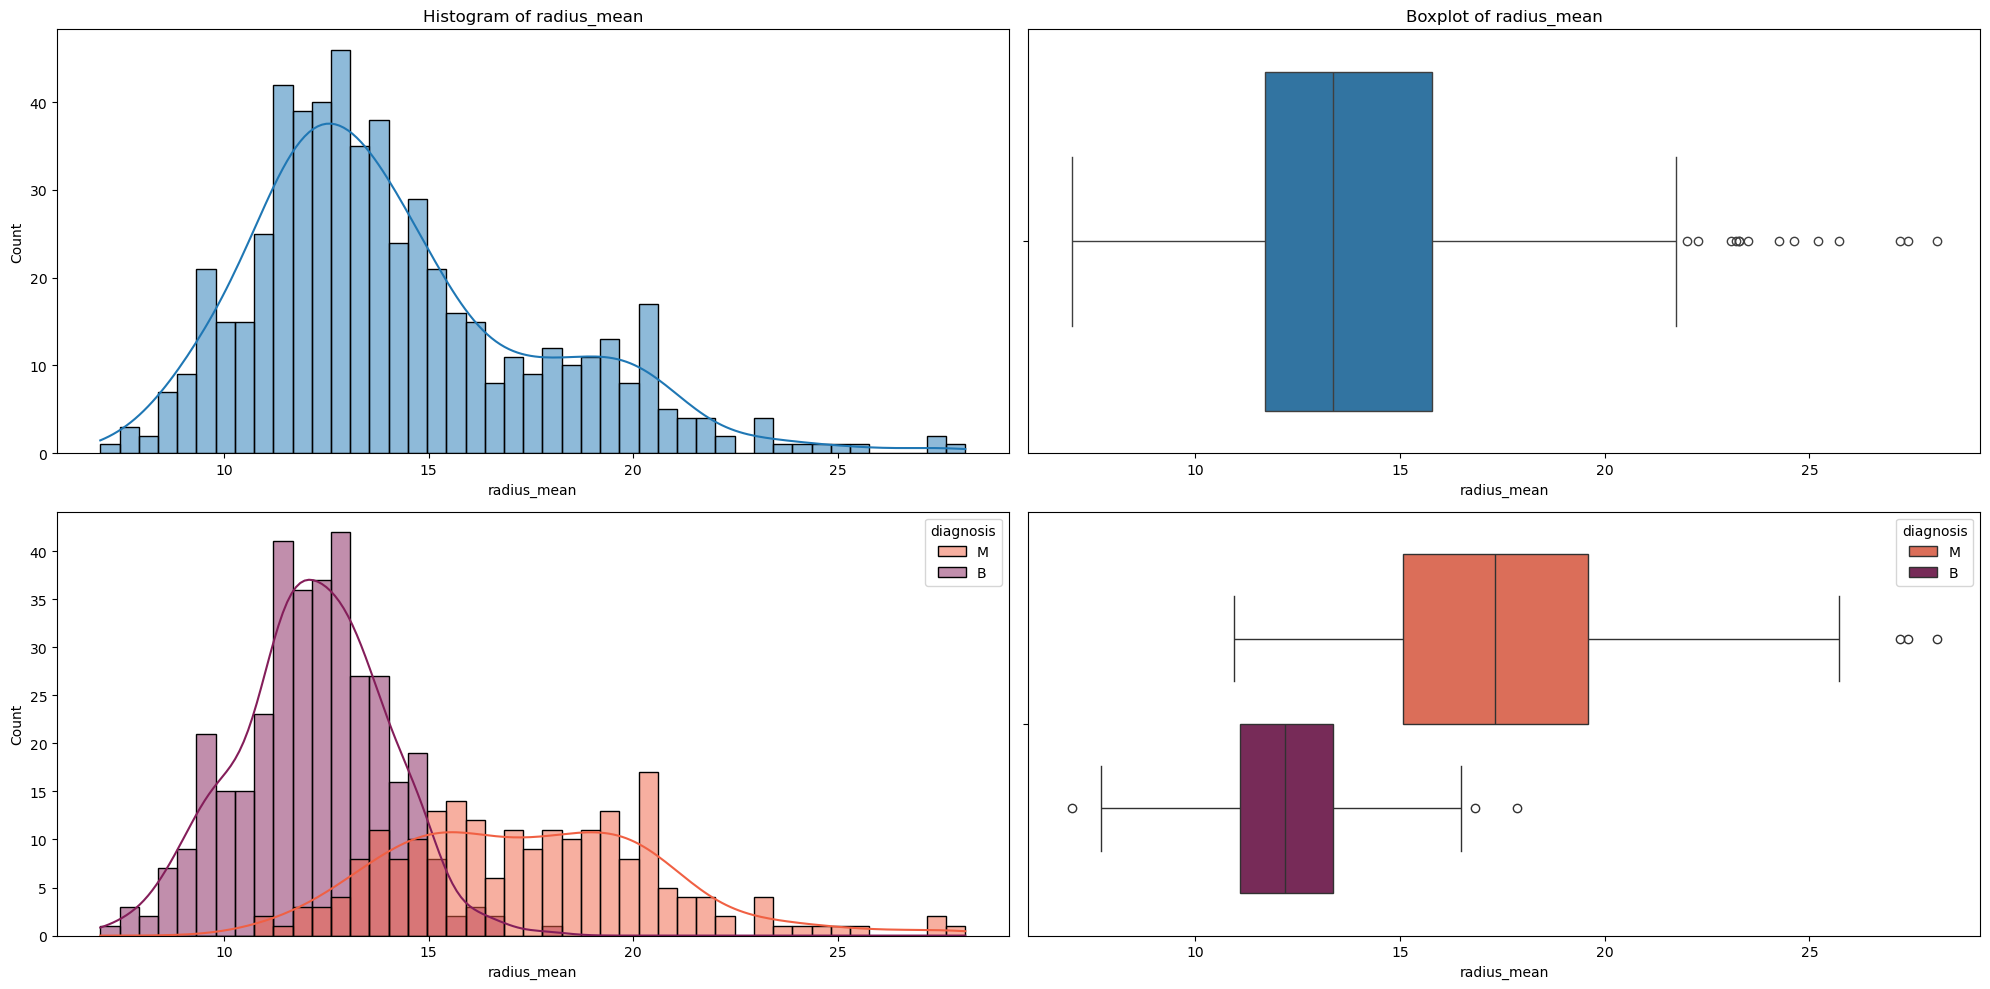

In [18]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 2, 1)
sns.histplot(data = df, x = 'radius_mean', kde = True, bins = 45)
plt.title('Histogram of radius_mean')

plt.subplot(2, 2, 2)
sns.boxplot(data = df, x = 'radius_mean')
plt.title('Boxplot of radius_mean')

plt.subplot(2, 2, 3)
sns.histplot(data = df, x = 'radius_mean', bins = 45, kde = True, hue = 'diagnosis', palette = 'rocket_r')

plt.subplot(2, 2, 4)
sns.boxplot(data = df, x = 'radius_mean', hue = 'diagnosis', palette = 'rocket_r')

plt.tight_layout()
plt.show()

<h3> Feature 3: texture_mean

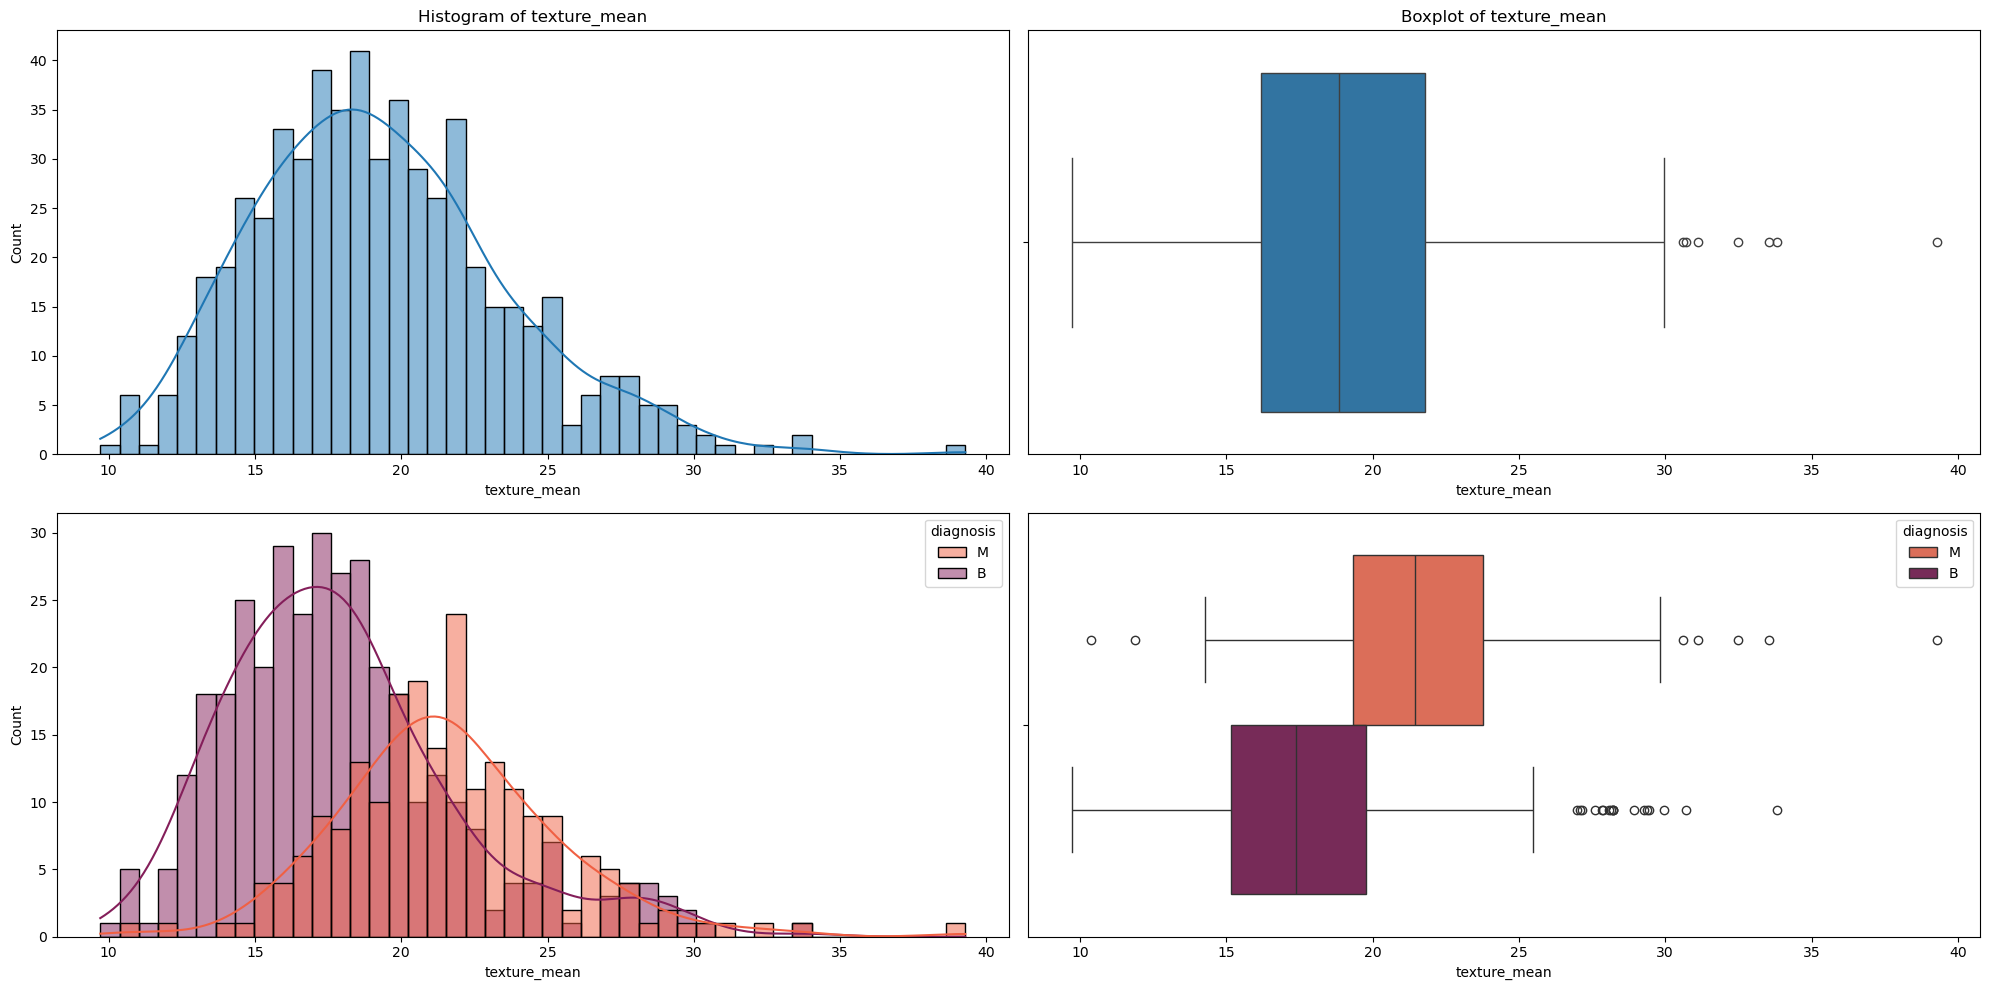

In [19]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 2, 1)
sns.histplot(data = df, x = 'texture_mean', kde = True, bins = 45)
plt.title('Histogram of texture_mean')

plt.subplot(2, 2, 2)
sns.boxplot(data = df, x = 'texture_mean')
plt.title('Boxplot of texture_mean')

plt.subplot(2, 2, 3)
sns.histplot(data = df, x = 'texture_mean', bins = 45, kde = True, hue = 'diagnosis', palette = 'rocket_r')

plt.subplot(2, 2, 4)
sns.boxplot(data = df, x = 'texture_mean', hue = 'diagnosis', palette = 'rocket_r')

plt.tight_layout()
plt.show()

<h3> Feature 4: perimeter_mean

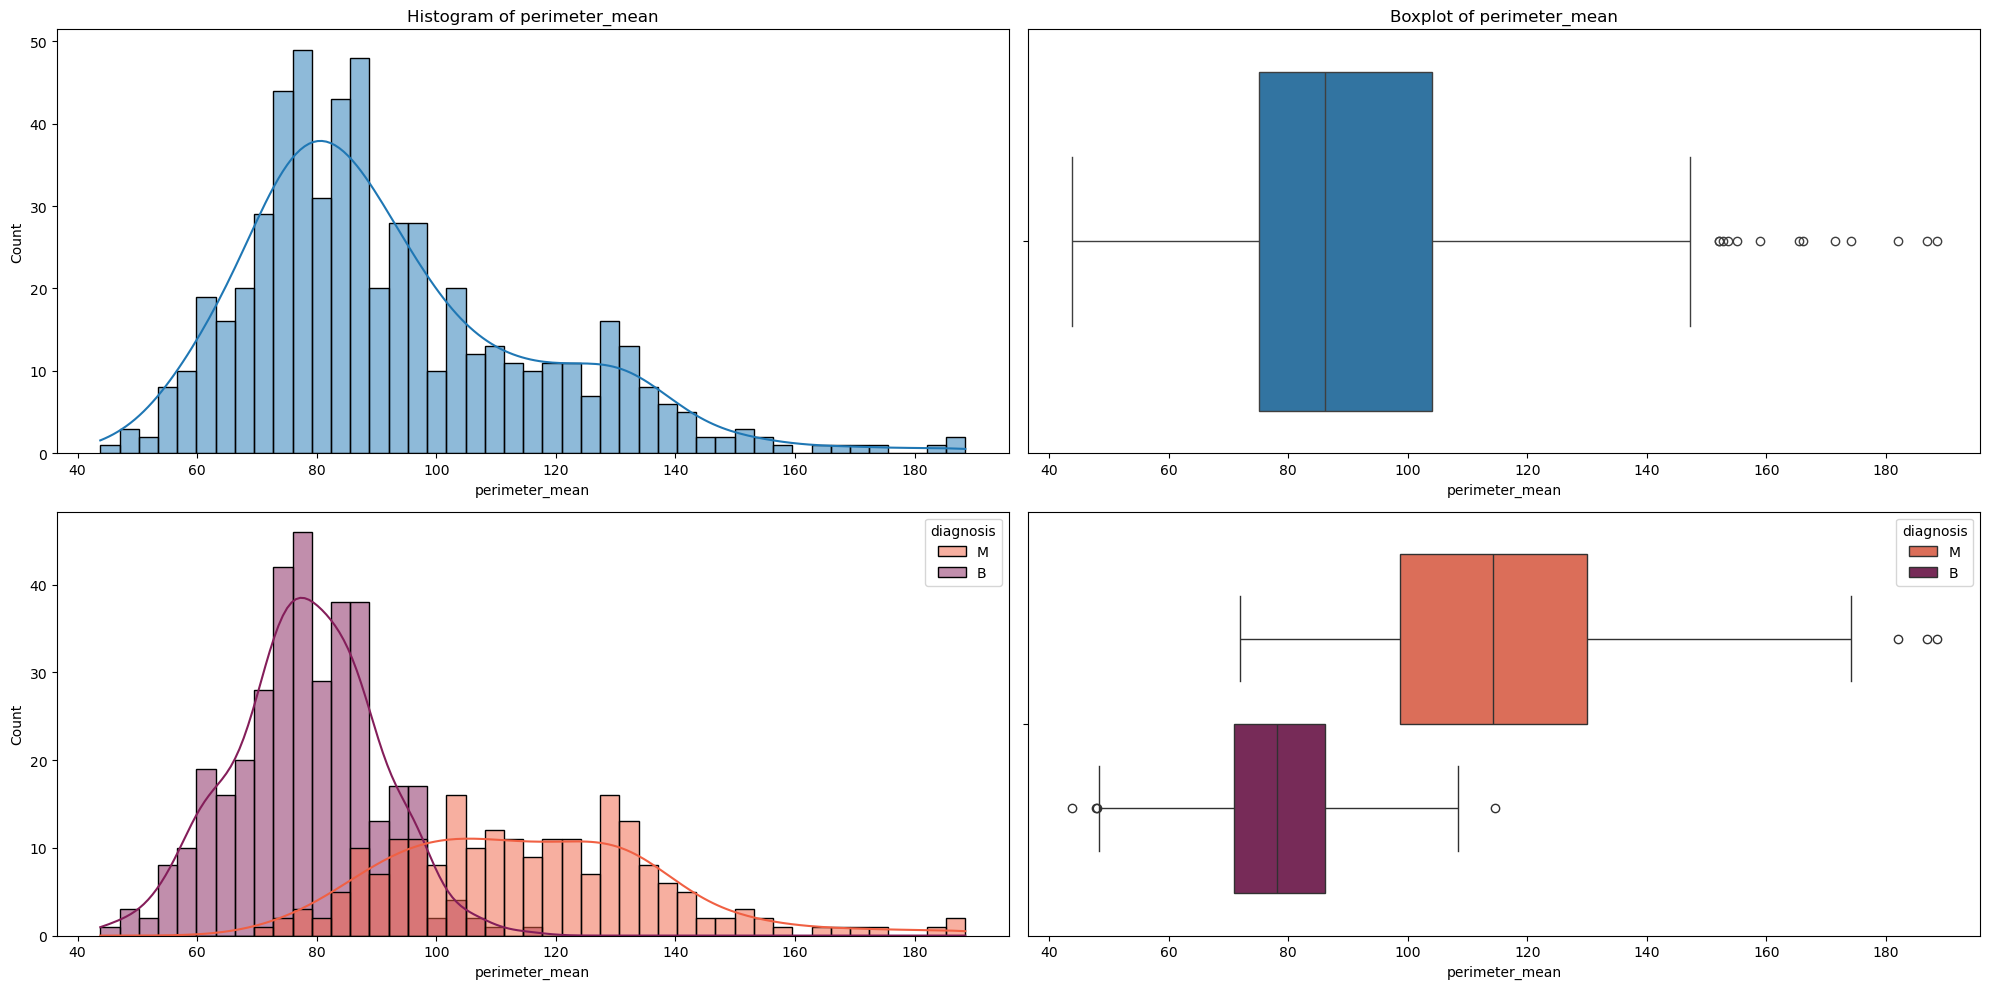

In [20]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 2, 1)
sns.histplot(data = df, x = 'perimeter_mean', kde = True, bins = 45)
plt.title('Histogram of perimeter_mean')

plt.subplot(2, 2, 2)
sns.boxplot(data = df, x = 'perimeter_mean')
plt.title('Boxplot of perimeter_mean')

plt.subplot(2, 2, 3)
sns.histplot(data = df, x = 'perimeter_mean', bins = 45, kde = True, hue = 'diagnosis', palette = 'rocket_r')

plt.subplot(2, 2, 4)
sns.boxplot(data = df, x = 'perimeter_mean', hue = 'diagnosis', palette = 'rocket_r')

plt.tight_layout()
plt.show()

<h3> Feature 5: area_mean

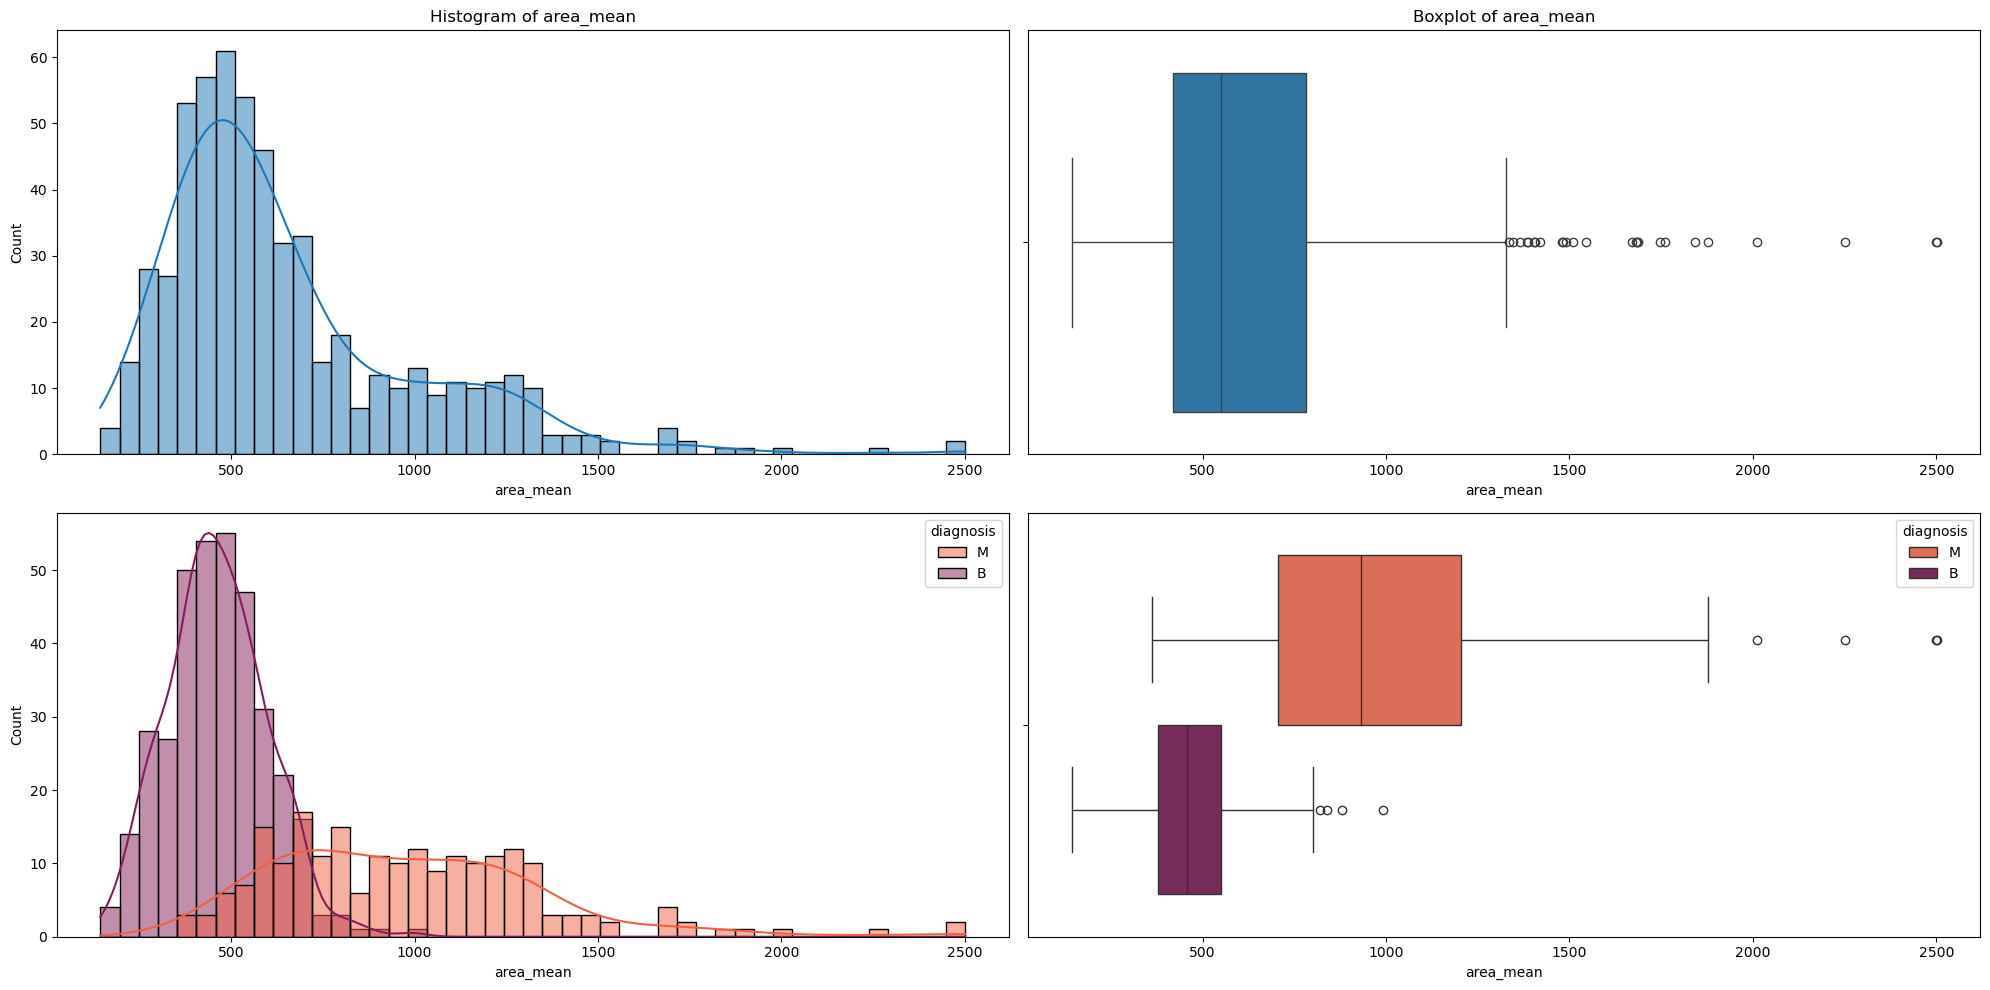

In [21]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 2, 1)
sns.histplot(data = df, x = 'area_mean', kde = True, bins = 45)
plt.title('Histogram of area_mean')

plt.subplot(2, 2, 2)
sns.boxplot(data = df, x = 'area_mean')
plt.title('Boxplot of area_mean')

plt.subplot(2, 2, 3)
sns.histplot(data = df, x = 'area_mean', bins = 45, kde = True, hue = 'diagnosis', palette = 'rocket_r')

plt.subplot(2, 2, 4)
sns.boxplot(data = df, x = 'area_mean', hue = 'diagnosis', palette = 'rocket_r')

plt.tight_layout()
plt.show()

<h3> Feature 6: smoothness_mean

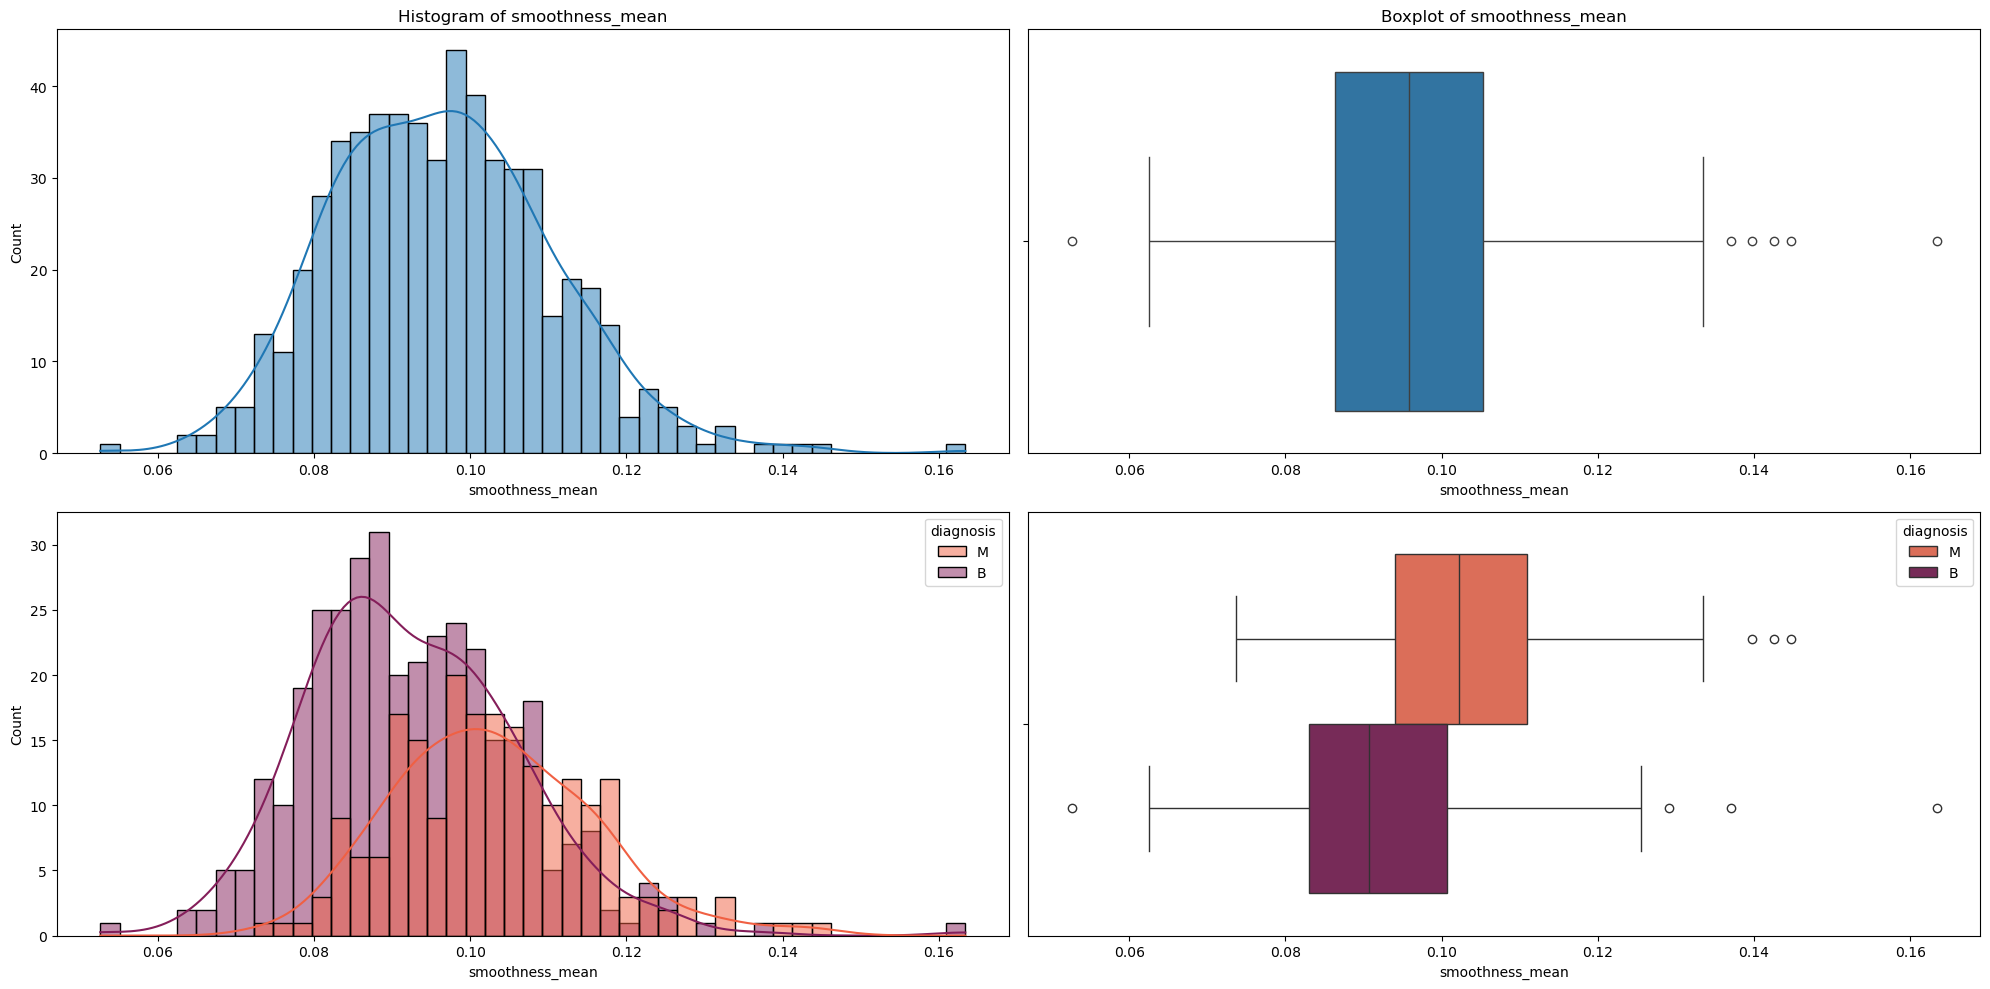

In [22]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 2, 1)
sns.histplot(data = df, x = 'smoothness_mean', kde = True, bins = 45)
plt.title('Histogram of smoothness_mean')

plt.subplot(2, 2, 2)
sns.boxplot(data = df, x = 'smoothness_mean')
plt.title('Boxplot of smoothness_mean')

plt.subplot(2, 2, 3)
sns.histplot(data = df, x = 'smoothness_mean', bins = 45, kde = True, hue = 'diagnosis', palette = 'rocket_r')

plt.subplot(2, 2, 4)
sns.boxplot(data = df, x = 'smoothness_mean', hue = 'diagnosis', palette = 'rocket_r')

plt.tight_layout()
plt.show()

<h3> Feature 7: compactness_mean

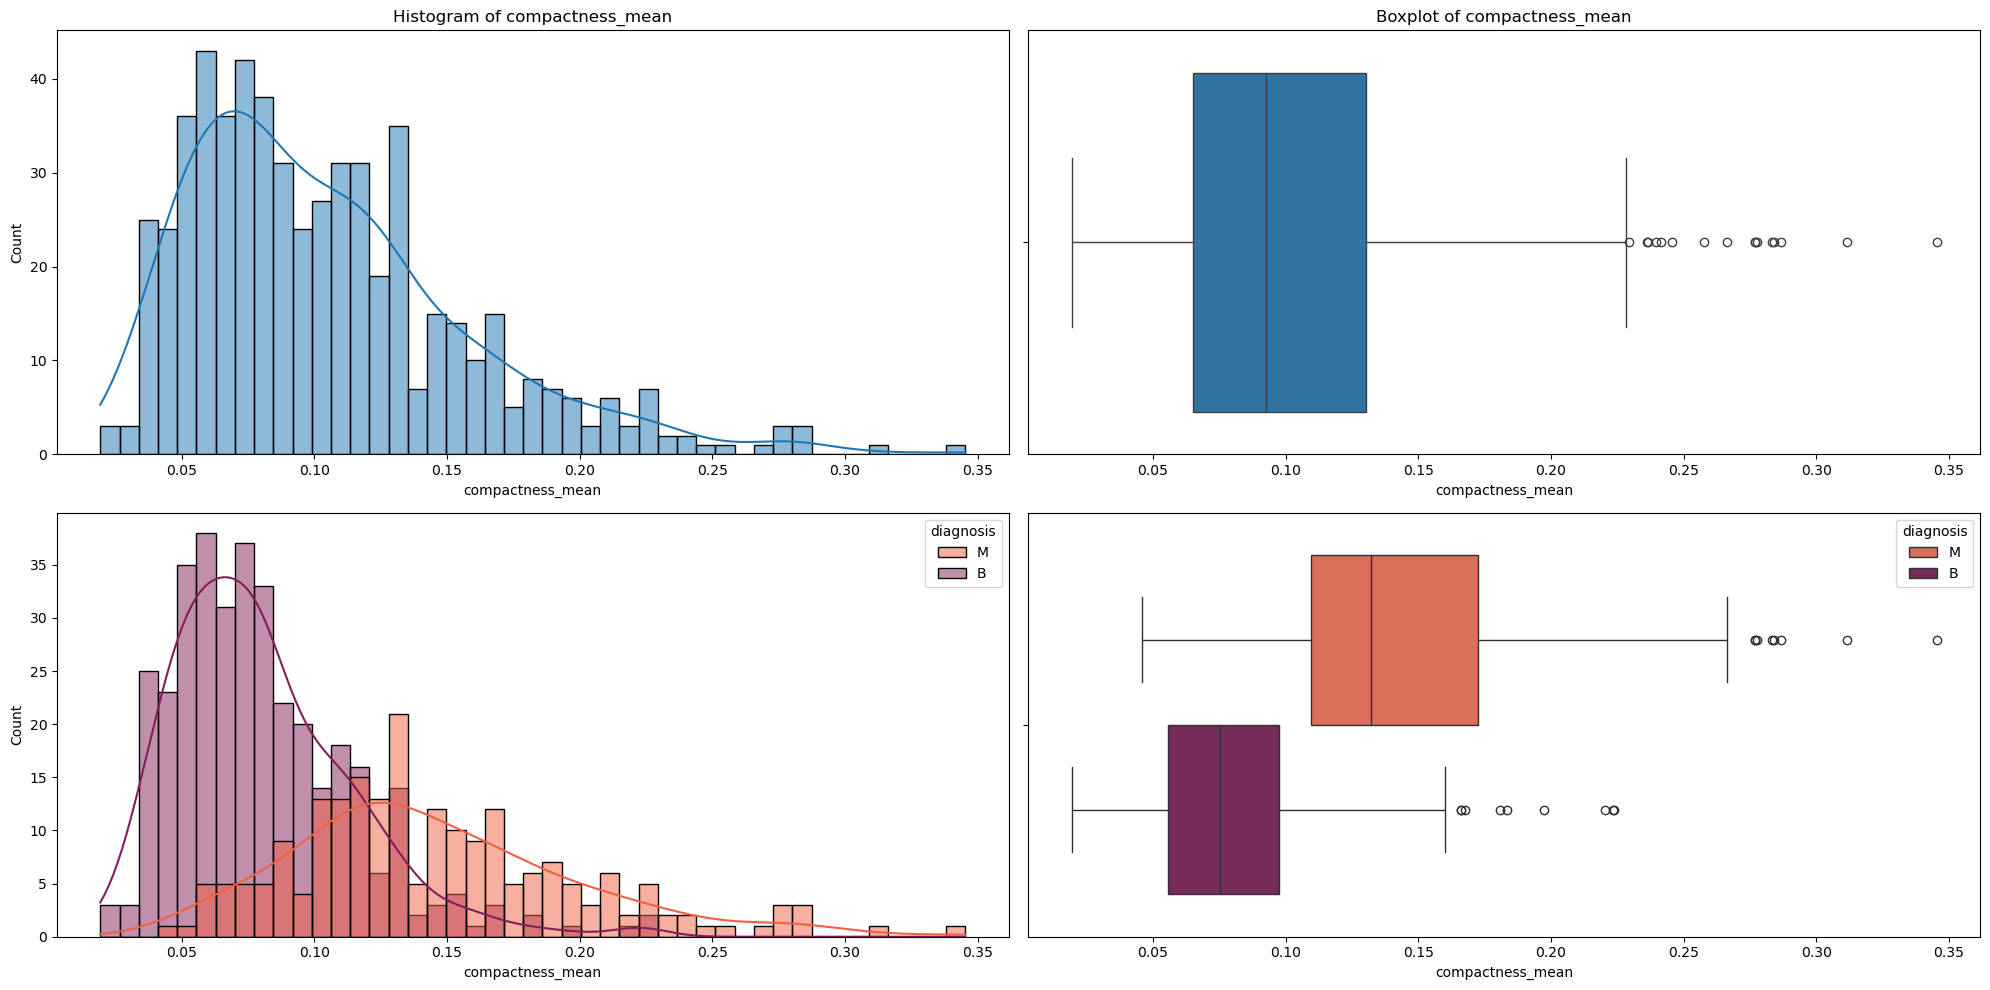

In [23]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 2, 1)
sns.histplot(data = df, x = 'compactness_mean', kde = True, bins = 45)
plt.title('Histogram of compactness_mean')

plt.subplot(2, 2, 2)
sns.boxplot(data = df, x = 'compactness_mean')
plt.title('Boxplot of compactness_mean')

plt.subplot(2, 2, 3)
sns.histplot(data = df, x = 'compactness_mean', bins = 45, kde = True, hue = 'diagnosis', palette = 'rocket_r')

plt.subplot(2, 2, 4)
sns.boxplot(data = df, x = 'compactness_mean', hue = 'diagnosis', palette = 'rocket_r')

plt.tight_layout()
plt.show()

Note: After observing some of these potentially important features, it appears that most of the features have a rough bell shaped curve (mostly left-skewed) and contains some outliers. Now, considering the fact that the dataset is actually very small (only a few hundred datapoints) and the context of the data (medical data), these outliers may contain some important information, hence, removing them without more information about the dataset origin and collection, will make it hard to determine whether they are just noise or actually contain some valuable information. 
Hence, in order to preserve the information, we will not be removing the outliers from the features.

# Data Mainpulation

Note: Since, we want to scale the data while preserving the outliers, we will be using MaxAbs scaler (However, Min-Max Scaler could also be used. The only differnce between the two is that the MaxAbs scaler scales the data in the range of [-1 , 1] while Min-Max scaler scales the data in the range [0, 1]).

In [24]:
categorical_feature_df = df['diagnosis']

In [25]:
numerical_features_df = df.drop(columns = ['diagnosis', 'id'])

In [26]:
# Defining the scaler
scaler = MaxAbsScaler()

# Applying MaxAbs scaler to the numerical features
scaled_numerical_features = scaler.fit_transform(numerical_features_df)

In [27]:
# Encoding the categorical feature ('diagnosis')
dummies_df = pd.get_dummies(categorical_feature_df, drop_first = True)

In [28]:
dummies_df.head()

,M
0,True
1,True
2,True
3,True
4,True


In [29]:
dummies_df.shape

(569, 1)

In [30]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(numerical_features_df, dummies_df, random_state = 52)

In [31]:
# Ensuring the y_train and y_test is a 1D array
y_train_1d = y_train.values.ravel()
y_test_1d = y_test.values.ravel()

# Model Training

<h4> Support Vector Machines

Using different SVM kernels

In [86]:
# Defining the model
model = svm.SVC()

scores = cross_val_score(model, X_train, y_train_1d, cv = 5) # Accuracy
print('Using kernel = "rbf"')
print('Cross-validation scores (without hyperparameter tuning): ', scores)
print('Mean cross-validation score (without hyperparameter tuning): ', scores.mean())
print('\n')

# Using a different kernel 
model = svm.SVC(kernel = 'poly')

scores = cross_val_score(model, X_train, y_train_1d, cv = 5) # Accuracy

print('Using kernel = "poly"')
print('Cross-validation scores (without hyperparameter tuning): ', scores)
print('Mean cross-validation score (without hyperparameter tuning): ', scores.mean())
print('\n')

# Using a different kernel
model = svm.SVC(kernel = 'sigmoid')

scores = cross_val_score(model, X_train, y_train_1d, cv = 5) # Accuracy

print('Using kernel = "sigmoid"')
print('Cross-validation scores (without hyperparameter tuning): ', scores)
print('Mean cross-validation score (without hyperparameter tuning): ', scores.mean())
print('\n')

# Using a different kernel
model = svm.SVC(kernel = 'linear')

scores = cross_val_score(model, X_train, y_train_1d, cv = 5) # Accuracy

print('Using kernel = "linear"')
print('Cross-validation scores (without hyperparameter tuning): ', scores)
print('Mean cross-validation score (without hyperparameter tuning): ', scores.mean())

Using kernel = "rbf"
Cross-validation scores (without hyperparameter tuning):  [0.88372093 0.92941176 0.89411765 0.90588235 0.85882353]
Mean cross-validation score (without hyperparameter tuning):  0.894391244870041


Using kernel = "poly"
Cross-validation scores (without hyperparameter tuning):  [0.87209302 0.91764706 0.90588235 0.89411765 0.85882353]
Mean cross-validation score (without hyperparameter tuning):  0.8897127222982215


Using kernel = "sigmoid"
Cross-validation scores (without hyperparameter tuning):  [0.43023256 0.4        0.42352941 0.54117647 0.49411765]
Mean cross-validation score (without hyperparameter tuning):  0.4578112175102599


Using kernel = "linear"
Cross-validation scores (without hyperparameter tuning):  [0.95348837 0.92941176 0.94117647 0.94117647 0.94117647]
Mean cross-validation score (without hyperparameter tuning):  0.9412859097127224


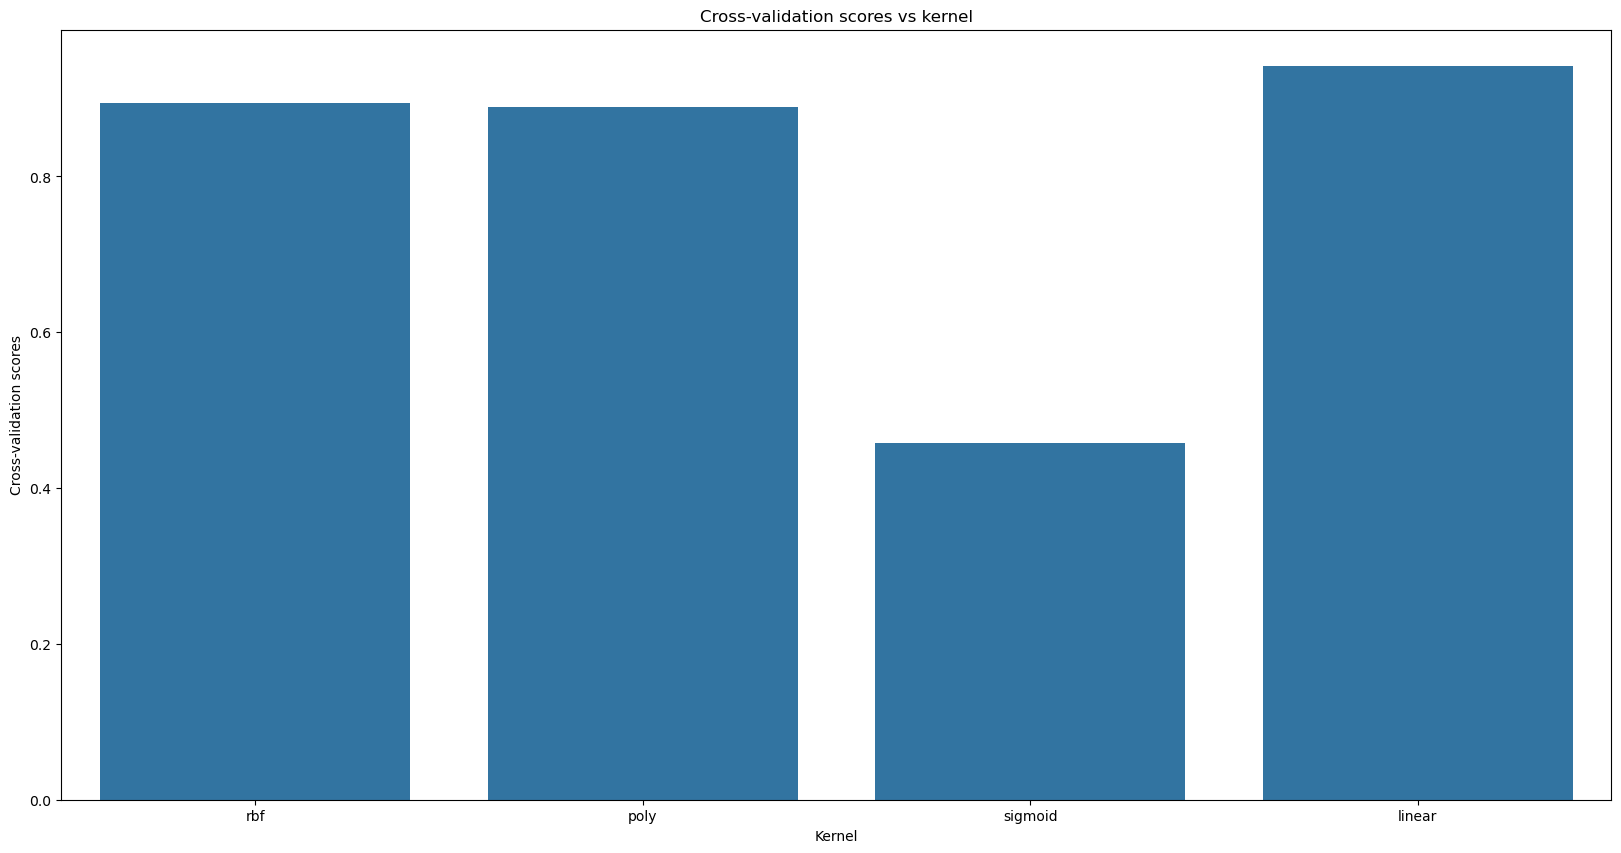

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating data points for the plot
scores = [0.894391244870041, 0.8897127222982215, 0.4578112175102599, 0.9412859097127224]
kernel = ['rbf', 'poly', 'sigmoid', 'linear']

plt.figure(figsize=(20, 10))

sns.barplot(x=kernel, y=scores)
plt.title('Cross-validation scores vs kernel')
plt.xlabel('Kernel')
plt.ylabel('Cross-validation scores')
plt.show()

In [33]:
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [34]:
# Tuning the SVM model
svm_param_grid = {
    'C': [0.5, 1, 2],
    'gamma': ['scale', 0.1, 0.05],
    'kernel': ['rbf'],
    'shrinking': [True],  # based on best parameters
    'decision_function_shape': ['ovr'],  # based on best parameters
}


In [35]:
# Performing a grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator = model, param_grid = svm_param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1)
grid_search.fit(X_train, y_train_1d)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.5, 1, 2], 'decision_function_shape': ['ovr'],
                         'gamma': ['scale', 0.1, 0.05], 'kernel': ['rbf'],
                         'shrinking': [True]},
             scoring='accuracy')

In [36]:
# Extract the best parameters after this grid search
best_svm_params = grid_search.best_params_
best_svm_params = {k: v for k, v in best_svm_params.items() if k in svm.SVC().get_params()}

In [37]:
print(best_svm_params)

{'C': 2, 'decision_function_shape': 'ovr', 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': True}


In [38]:
# Defining the model
best_svm_model = svm.SVC(**best_svm_params, probability=True)

best_svm_scores = cross_val_score(best_svm_model, X_train, y_train_1d, cv = 5) # Accuracy

print('Cross-validation scores (with hyperparameter tuning): ', best_svm_scores)
print('Mean cross-validation score (with hyperparameter tuning): ', best_svm_scores.mean())

Cross-validation scores (with hyperparameter tuning):  [0.88372093 0.92941176 0.90588235 0.91764706 0.88235294]
Mean cross-validation score (with hyperparameter tuning):  0.9038030095759233


In [39]:
best_svm_model.fit(X_train, y_train_1d)

svm_train_accuracy = accuracy_score(y_train_1d, best_svm_model.predict(X_train))
svm_test_accuracy = accuracy_score(y_test_1d, best_svm_model.predict(X_test))
print(f"SVM Training Accuracy: {svm_train_accuracy}")
print(f"SVM Testing Accuracy: {svm_test_accuracy}")

SVM Training Accuracy: 0.9154929577464789
SVM Testing Accuracy: 0.958041958041958


Obeservation: No change after a parameter search

<h3> Random Forest

In [40]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 52)

In [41]:
# Training accuracy
rf.fit(X_train, y_train_1d)
y_pred = rf.predict(X_test)
training_accuracy = accuracy_score(y_test, y_pred)
training_report = classification_report(y_test, y_pred)
print('Training accuracy: ', training_accuracy)
print(training_report)

Training accuracy:  0.9790209790209791
              precision    recall  f1-score   support

       False       0.99      0.98      0.98        93
        True       0.96      0.98      0.97        50

    accuracy                           0.98       143
   macro avg       0.97      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [42]:
rf_scores = cross_val_score(rf, X_train, y_train_1d, cv = 5) # Accuracy

print('Cross-validation scores (without hyperparameter tuning): ', rf_scores)
print('Mean cross-validation score (without hyperparameter tuning): ', rf_scores.mean())

Cross-validation scores (without hyperparameter tuning):  [0.98837209 0.98823529 0.92941176 0.91764706 0.94117647]
Mean cross-validation score (without hyperparameter tuning):  0.95296853625171


Observation: There is some slight overfitting in the model, but in general the model is performing quite well.

Hyperparamter Tuning

In [43]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 52,
 'verbose': 0,
 'warm_start': False}

In [44]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'random_state': [52]
}

In [45]:
grid_search = GridSearchCV(estimator = rf, param_grid = rf_param_grid, cv = 5, n_jobs = -1, verbose = 2)

In [46]:
grid_search.fit(X_train, y_train_1d)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=100, random_state=52; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=100, random_state=52; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=100, random_state=52; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=100, random_state=52; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=100, random_state=52; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=200, random_state=52; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=200, random_state=52; total time=   0.3s
[CV] END bootstrap=True, cr

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=52), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200, 300],
                         'random_state': [52]},
             verbose=2)

In [47]:
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

Best parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 300, 'random_state': 52}


In [48]:
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train_1d)

RandomForestClassifier(bootstrap=False, criterion='entropy', n_estimators=300,
                       random_state=52)

In [49]:
best_rf_scores = cross_val_score(best_rf, X_train, y_train_1d, cv = 5) # Accuracy

print('Cross-validation scores (with hyperparameter tuning): ', best_rf_scores)
print('Mean cross-validation score (with hyperparameter tuning): ', best_rf_scores.mean())

Cross-validation scores (with hyperparameter tuning):  [0.97674419 1.         0.94117647 0.91764706 0.97647059]
Mean cross-validation score (with hyperparameter tuning):  0.962407660738714


In [50]:
# Fitting the model to the training data
best_rf.fit(X_train, y_train_1d)

# Predicting on the training data
rf_train_predictions = best_rf.predict(X_train)
rf_train_accuracy = accuracy_score(y_train_1d, rf_train_predictions)

# Predicting on the test data
rf_test_predictions = best_rf.predict(X_test)
rf_test_accuracy = accuracy_score(y_test_1d, rf_test_predictions)

# Printing the accuracies
print(f"Random Forest Training Accuracy: {rf_train_accuracy}")
print(f"Random Forest Testing Accuracy: {rf_test_accuracy}")

Random Forest Training Accuracy: 1.0
Random Forest Testing Accuracy: 0.993006993006993


<h3> Neural Network

In [51]:
type(X_train)
X_train.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

In [52]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [53]:
print(type(y_train_1d))

<class 'numpy.ndarray'>


Note: The train and the test datasets are currently in the dataframe format. 

In [54]:
# Converting the train and test datasets into numpy arrays for PyTorch
X_train_np = X_train.to_numpy() 
y_train_np = y_train.to_numpy() # These are in pandas series 
X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy() # These are in pandas series

In [55]:
# Converting the split data into pytorch tensors
X_train_tensor = torch.tensor(X_train_np, dtype = torch.float32)
y_train_tensor = torch.tensor(y_train_1d, dtype = torch.long)
X_test_tensor = torch.tensor(X_test_np, dtype = torch.float32)
y_test_tensor = torch.tensor(y_test_1d, dtype = torch.long)

In [56]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle = False)

In [57]:
# Step 2: Defining Neural Network
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Model Parameters
input_size = X_train.shape[1]
hidden_size = 64  # Hyperparameter to tune
output_size = len(set(y_train_1d))  # Adjust this based on your problem

# Step 3: Training Loop
def train_model(model, train_loader, criterion, optimizer, epochs=20):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

# Step 4: Hyperparameter Tuning
def hyperparameter_tuning(train_loader, test_loader, input_size, output_size):
    best_accuracy = 0
    best_params = {}

    hidden_sizes = [32, 64, 128]
    learning_rates = [0.01, 0.001]
    epochs = 10

    for hidden_size in hidden_sizes:
        for lr in learning_rates:
            model = SimpleNN(input_size, hidden_size, output_size)
            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr=lr)
            train_model(model, train_loader, criterion, optimizer, epochs)

            # Evaluate model
            model.eval()
            y_pred = []
            with torch.no_grad():
                for inputs, labels in test_loader:
                    outputs = model(inputs)
                    _, predicted = torch.max(outputs, 1)
                    y_pred.extend(predicted.numpy())

            # Calculate accuracy
            accuracy = accuracy_score(y_test, y_pred)
            print(f"Hidden Size: {hidden_size}, Learning Rate: {lr}, Accuracy: {accuracy:.4f}")

            # Update best model if current is better
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'hidden_size': hidden_size, 'learning_rate': lr}

    print("Best Hyperparameters:", best_params)
    print("Best Accuracy:", best_accuracy)
    return best_params

# Running the hyperparameter tuning
best_params = hyperparameter_tuning(train_loader, test_loader, input_size, output_size)

Epoch [1/10], Loss: 11.4258
Epoch [2/10], Loss: 1.5113
Epoch [3/10], Loss: 0.5346
Epoch [4/10], Loss: 0.4097
Epoch [5/10], Loss: 0.3092
Epoch [6/10], Loss: 0.4250
Epoch [7/10], Loss: 0.2709
Epoch [8/10], Loss: 0.2628
Epoch [9/10], Loss: 0.4929
Epoch [10/10], Loss: 0.2902
Hidden Size: 32, Learning Rate: 0.01, Accuracy: 0.9371
Epoch [1/10], Loss: 9.4337
Epoch [2/10], Loss: 3.8062
Epoch [3/10], Loss: 1.4471
Epoch [4/10], Loss: 0.4733
Epoch [5/10], Loss: 0.2722
Epoch [6/10], Loss: 0.2337
Epoch [7/10], Loss: 0.2530
Epoch [8/10], Loss: 0.2504
Epoch [9/10], Loss: 0.2375
Epoch [10/10], Loss: 0.2234
Hidden Size: 32, Learning Rate: 0.001, Accuracy: 0.9580
Epoch [1/10], Loss: 15.1221
Epoch [2/10], Loss: 1.4529
Epoch [3/10], Loss: 1.0593
Epoch [4/10], Loss: 0.5248
Epoch [5/10], Loss: 0.4396
Epoch [6/10], Loss: 0.4419
Epoch [7/10], Loss: 0.3892
Epoch [8/10], Loss: 0.4757
Epoch [9/10], Loss: 0.6323
Epoch [10/10], Loss: 0.5029
Hidden Size: 64, Learning Rate: 0.01, Accuracy: 0.7902
Epoch [1/10], Loss:

In [58]:
# Assuming best_params contains the best hyperparameters from hyperparameter tuning
best_hidden_size = best_params['hidden_size']
best_learning_rate = best_params['learning_rate']

# Define the neural network model with the best hyperparameters
model = SimpleNN(input_size, best_hidden_size, output_size)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=best_learning_rate)

# Train the model
train_model(model, train_loader, criterion, optimizer, epochs=20)

# Evaluate the model on the training data
model.eval()

Epoch [1/20], Loss: 13.8242
Epoch [2/20], Loss: 4.4386
Epoch [3/20], Loss: 1.1082
Epoch [4/20], Loss: 0.4297
Epoch [5/20], Loss: 0.3210
Epoch [6/20], Loss: 0.2824
Epoch [7/20], Loss: 0.2959
Epoch [8/20], Loss: 0.2754
Epoch [9/20], Loss: 0.3146
Epoch [10/20], Loss: 0.2719
Epoch [11/20], Loss: 0.2828
Epoch [12/20], Loss: 0.2838
Epoch [13/20], Loss: 0.2620
Epoch [14/20], Loss: 0.3295
Epoch [15/20], Loss: 0.2894
Epoch [16/20], Loss: 0.2640
Epoch [17/20], Loss: 0.2727
Epoch [18/20], Loss: 0.2628
Epoch [19/20], Loss: 0.2567
Epoch [20/20], Loss: 0.3740


SimpleNN(
  (fc1): Linear(in_features=30, out_features=32, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=32, out_features=2, bias=True)
)

In [59]:
train_predictions = []
with torch.no_grad():
    for inputs, labels in train_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        train_predictions.extend(predicted.cpu().numpy())  # Ensure tensor is on CPU before converting to numpy

train_accuracy = accuracy_score(y_train_1d, train_predictions)

# Evaluate the model on the test data
test_predictions = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        test_predictions.extend(predicted.cpu().numpy())  # Ensure tensor is on CPU before converting to numpy

test_accuracy = accuracy_score(y_test_1d, test_predictions)

# Print the accuracies
print(f"Neural Network Training Accuracy: {train_accuracy}")
print(f"Neural Network Testing Accuracy: {test_accuracy}")


Neural Network Training Accuracy: 0.5070422535211268
Neural Network Testing Accuracy: 0.9230769230769231


# Plots

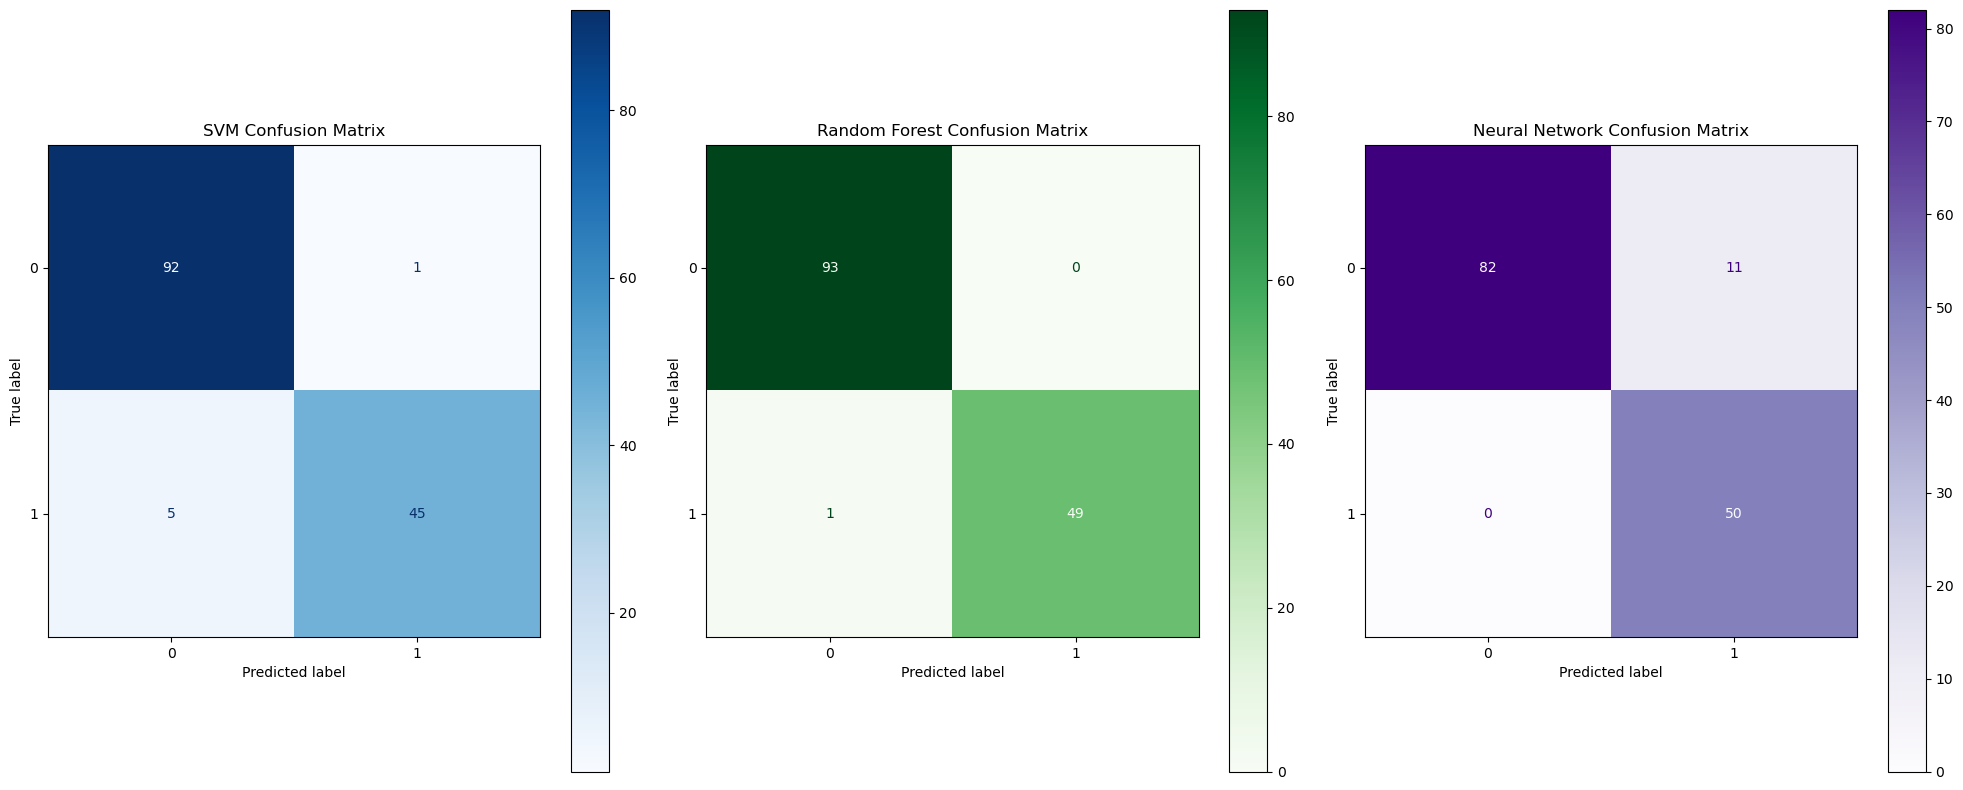

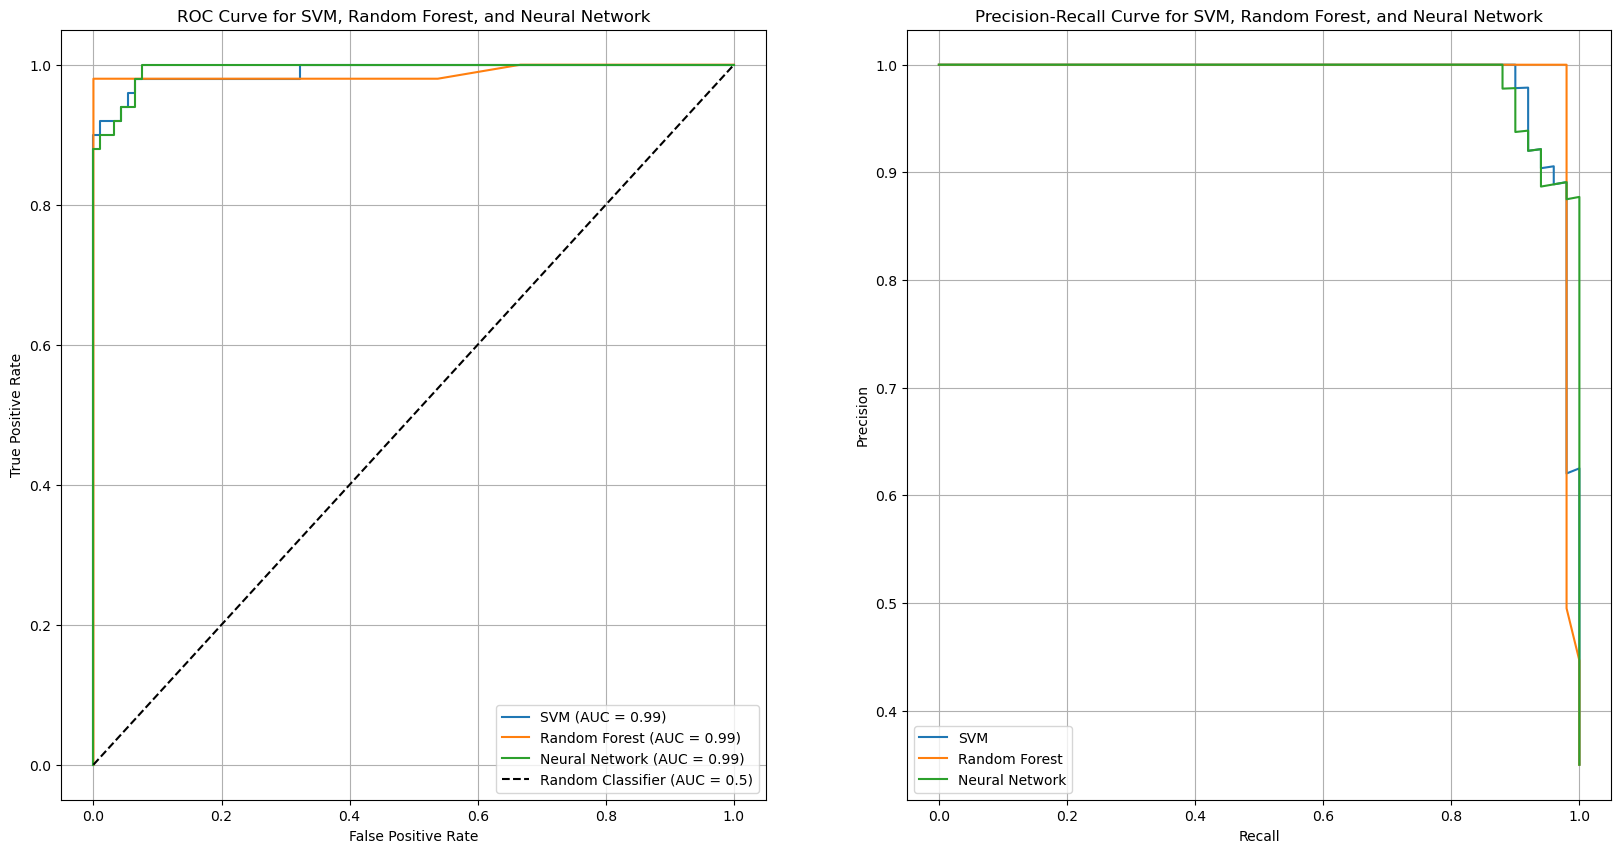

In [ ]:
model.eval()  # Set to evaluation mode
with torch.no_grad():
    nn_logits = model(X_test_tensor)  # Raw outputs (logits)
    nn_probs = F.softmax(nn_logits, dim=1).numpy()  # Probabilities

# Use the class with the highest probability as the predicted class
nn_predictions = nn_probs.argmax(axis=1)

# Generate the NN confusion matrix using the predictions
nn_cm = confusion_matrix(y_test, nn_predictions)

# Continue with your existing code to plot the confusion matrices:
plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
ConfusionMatrixDisplay(svm_cm).plot(cmap='Blues', ax=plt.gca())
plt.title("SVM Confusion Matrix")

plt.subplot(1, 3, 2)
ConfusionMatrixDisplay(rf_cm).plot(cmap='Greens', ax=plt.gca())
plt.title("Random Forest Confusion Matrix")

plt.subplot(1, 3, 3)
ConfusionMatrixDisplay(nn_cm).plot(cmap='Purples', ax=plt.gca())
plt.title("Neural Network Confusion Matrix")
plt.tight_layout()
plt.show()

# For the ROC and Precision-Recall curves, use the probabilities of the positive class (1):
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probs[:, 1])
nn_prec, nn_recall, _ = precision_recall_curve(y_test, nn_probs[:, 1])

model.eval()  # Set NN model to evaluation mode
with torch.no_grad():
    nn_logits = model(X_test_tensor)  # Obtain raw outputs (logits) from the NN
    nn_probs = F.softmax(nn_logits, dim=1).numpy()  # Convert logits to probabilities

# --- Visualization 2: ROC Curve for SVM, Random Forest, and Neural Network ---

# Calculate ROC curves and AUCs
svm_fpr, svm_tpr, _ = roc_curve(y_test, best_svm_model.predict_proba(X_test)[:, 1])
rf_fpr, rf_tpr, _ = roc_curve(y_test, best_rf.predict_proba(X_test)[:, 1])
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probs[:, 1])  # Use probabilities for the positive class (class 1)
svm_auc = auc(svm_fpr, svm_tpr)
rf_auc = auc(rf_fpr, rf_tpr)
nn_auc = auc(nn_fpr, nn_tpr)

# Plot ROC curves
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM, Random Forest, and Neural Network')
plt.legend()
plt.grid(True)


# --- Visualization 3: Precision-Recall Curve for SVM, Random Forest, and Neural Network ---

# Calculate Precision-Recall curves
svm_prec, svm_recall, _ = precision_recall_curve(y_test, best_svm_model.predict_proba(X_test)[:, 1])
rf_prec, rf_recall, _ = precision_recall_curve(y_test, best_rf.predict_proba(X_test)[:, 1])
nn_prec, nn_recall, _ = precision_recall_curve(y_test, nn_probs[:, 1])  # Use probabilities for the positive class

# Plot Precision-Recall curves
plt.subplot(1, 2, 2)
plt.plot(svm_recall, svm_prec, label='SVM')
plt.plot(rf_recall, rf_prec, label='Random Forest')
plt.plot(nn_recall, nn_prec, label='Neural Network')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM, Random Forest, and Neural Network')
plt.legend()
plt.grid(True)
plt.show()

# Data Storage

In [85]:
# Step 1: Save the trained models using joblib
joblib.dump(best_svm_model, 'best_svm_model.joblib')
joblib.dump(best_rf, 'best_rf_model.joblib')
torch.save(model.state_dict(), 'neural_network_model.pth')  # For PyTorch model, save the state dictionary

# Step 2: Generate predictions for the test set
svm_predictions = best_svm_model.predict(X_test)
rf_predictions = best_rf.predict(X_test)

# For Neural Network, obtain predictions using PyTorch
model.eval()
with torch.no_grad():
    nn_logits = model(X_test_tensor)
    nn_predictions = nn_logits.argmax(dim=1).numpy()  # Convert logits to class predictions

y_test_flat = y_test_1d.flatten()

# Step 3: Create a DataFrame with true labels and predictions from each model
results_df = pd.DataFrame({
    'True_Label': y_test_flat,
    'SVM_Prediction': svm_predictions,
    'RF_Prediction': rf_predictions,
    'NN_Prediction': nn_predictions
})

# Step 4: Save the results to a CSV file
results_df.to_csv('model_predictions.csv', index=False)

print("Results saved to model_predictions.csv")

Results saved to model_predictions.csv
